In [ ]:
# pip install ucimlrepo

In [ ]:
from   ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from   sklearn.linear_model import LinearRegression

Fetch Dataset and data frames in x and y

In [ ]:
# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

MetaData of the Dataset

In [ ]:
# metadata
print(concrete_compressive_strength.metadata)

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

Variable Information

In [ ]:
# variable information
print(concrete_compressive_strength.variables)

                            name     role        type demographic description  \
0                         Cement  Feature  Continuous        None        None   
1             Blast Furnace Slag  Feature     Integer        None        None   
2                        Fly Ash  Feature  Continuous        None        None   
3                          Water  Feature  Continuous        None        None   
4               Superplasticizer  Feature  Continuous        None        None   
5               Coarse Aggregate  Feature  Continuous        None        None   
6                 Fine Aggregate  Feature  Continuous        None        None   
7                            Age  Feature     Integer        None        None   
8  Concrete compressive strength   Target  Continuous        None        None   

    units missing_values  
0  kg/m^3             no  
1  kg/m^3             no  
2  kg/m^3             no  
3  kg/m^3             no  
4  kg/m^3             no  
5  kg/m^3             no  


Combine the Data

In [ ]:
entire_data = pd.concat([X, y], axis = 1)
entire_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Correlation of the Data

In [ ]:
entire_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete compressive strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

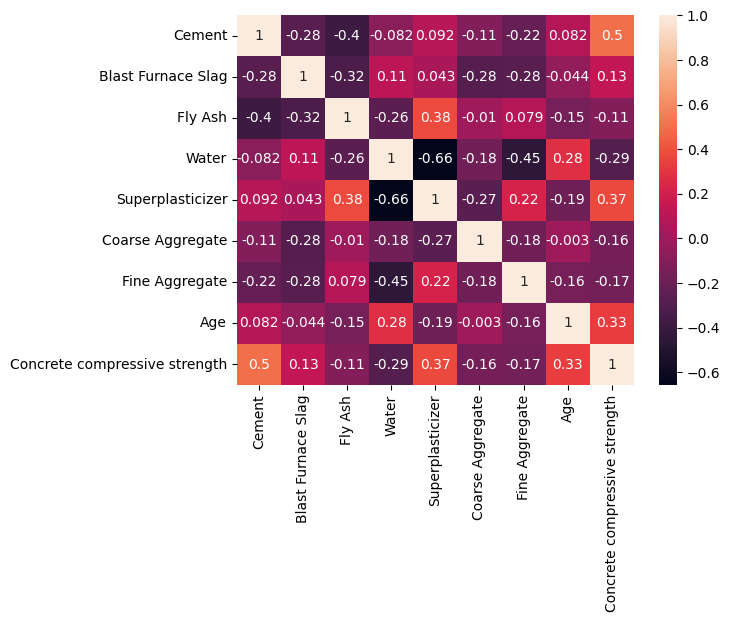

In [ ]:
sns.heatmap(entire_data.corr(), annot = True)

#### Split Data into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)
print(X_train.shape, y_train.shape)

(721, 8) (721, 1)


***Linear Regression***

In [ ]:
# Create an Object of Linear Regression Class
lr = LinearRegression()

# Fit the Linear Regression Model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.intercept_, lr.coef_)

[-35.44918333] [[ 0.12726535  0.11257926  0.09835135 -0.13691381  0.23733402  0.02020436
   0.02616505  0.12251105]]


In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5771752777048793

In [ ]:
import numpy as np
x=np.array([2,5,7,8,9,10,23,45])
y=np.array([13,15,20,34,36,56,66,78])

In [ ]:
xsum=np.sum(x)
ysum=np.sum(y)

In [ ]:
xysum=np.sum(x*y)
n=len(x)
numerator=(xsum*ysum)/n-xysum
denominator=(xsum**2)/n-np.sum(x**2)

In [ ]:
b1=numerator/denominator
b0=ysum/n-b1*xsum/n
print(b0,b1)

19.269061517736866 1.5031881454872025


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x.reshape(-1,1),y)
lr.intercept_,lr.coef_

(19.26906151773687, array([1.50318815]))

In [ ]:
df=pd.read_csv("Boston.csv") #medv is the response variable

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
#Separating target and input columns and performing train_test split
y=df["medv"]
X=df.drop("medv",axis=1)
X_T,X_test,y_T,y_test=train_test_split(X,y,random_state=24,test_size=0.3)

In [ ]:
#Fitting model
lr=LinearRegression()
lr.fit(X_T,y_T)

LinearRegression()

In [ ]:
#Predict values and R2 score
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.7133431144123463

In [ ]:
df['lstat'].corr(df["medv"])

-0.7376627261740151

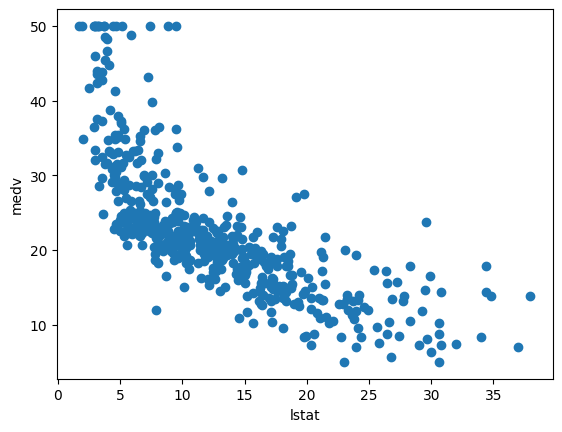

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['lstat'], df['medv'])
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()